Part 1: Data Exploration

In [2]:
# LOAD ZONE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# DATA
df_test = pd.read_csv("data/test.csv")
df_train = pd.read_csv("data/train.csv")

In [25]:
# General Description
df_train
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_multiple
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.267116
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.547134
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,4.000000


Text(0, 0.5, 'Percent of Survivors')

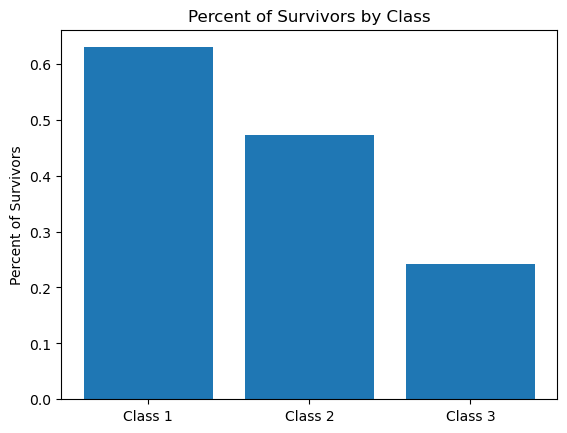

In [5]:
# How does CLASS affect survivor status?
# Percent of class 3 passengers who survived
surv_perc_c3 = sum((df_train['Pclass'] == 3) & (df_train['Survived'] == 1))/sum(df_train['Pclass'] == 3)
# Percent of class 2 passengers who survived
surv_perc_c2 = sum((df_train['Pclass'] == 2) & (df_train['Survived'] == 1))/sum(df_train['Pclass'] == 2)
# Percent of class 1 passengers who survived
surv_perc_c1 = sum((df_train['Pclass'] == 1) & (df_train['Survived'] == 1))/sum(df_train['Pclass'] == 1)
# Clearly survival status is correlated to class status
# Graph this discrepency
labels = ['Class 1', 'Class 2', 'Class 3']
percent = [surv_perc_c1, surv_perc_c2, surv_perc_c3]

plt.bar(labels, percent)

plt.title('Percent of Survivors by Class')
plt.ylabel('Percent of Survivors')

In [6]:
# How does GENDER affect survivor status?
surv_perc_male = sum((df_train['Sex'] == 'male') & (df_train['Survived'] == 1))/sum(df_train['Sex'] == 'male')
print(surv_perc_male)

surv_perc_female = sum((df_train['Sex'] == 'female') & (df_train['Survived'] == 1))/sum(df_train['Sex'] == 'female')
print(surv_perc_female)
# Men survived at a much lower rate than women

0.18890814558058924
0.7420382165605095


In [26]:
# How does AGE affect survivor status?
bins_age = [0,2,4,12,18,30,70,200]
labels_age = ['infant','toddler','kid','teen','young adult','adult','elderly']
df_train['age_group'] = pd.cut(df_train['Age'], bins = bins_age, labels = labels_age)
pd.pivot_table(df_train, index = 'Survived', columns = 'age_group', values = 'Name', aggfunc = 'count')
# Add gender to the equation
pd.pivot_table(df_train, index = ['Survived','Sex'], columns = 'age_group', values = 'Name', aggfunc = 'count')
# Interestingly, female children did not have as high of a chance of surival as female adults
# Male children much more likely to survive

age_group        infant  toddler  kid  teen  young adult  adult  elderly
Survived Sex                                                            
0        female       4        1    8     9           22     20        0
         male         5        3    8    31          152    157        4
1        female       6        6    7    27           68     83        0
         male         9        6    6     3           28     40        1

In [16]:
# How does NUMBER OF CABINS affect survivor status?
df_train['Cabin']
# NaN (probably) means no personal cabin
df_train['cabin_multiple'] = df_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
pd.pivot_table(df_train, index = ['Survived'], columns = 'cabin_multiple', values = 'Name', aggfunc = 'count')
# Having multiple cabins worked to your advantage

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [18]:
# How does CABIN LETTER affect survivor status?
# Perhaps cabin letter indicates the floor someone was on or the 
df_train['cabin_let'] = df_train.Cabin.apply(lambda x: str(x)[0])
pd.pivot_table(df_train, index = ['Survived'], columns = 'cabin_let', values = 'Name', aggfunc = 'count')
# Does not seem to be an obvious pattern between letters

cabin_let,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [21]:
# How does TITLE affect survivor status?
df_train.Name.head(50)
df_train['name_title'] = df_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
pd.pivot_table(df_train, index = ['Survived'], columns = 'name_title', values = 'Name', aggfunc = 'count')

# Special titles were generally helpful, although -- notably -- "Reverend" was not

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [29]:
# How does FARE affect survivor status
bins_fare = [-.1,.1,10,40,100,600]
labels_fare = ['zero','low','medium','high','very high']
df_train['fare_group'] = pd.cut(df_train['Fare'], bins = bins_fare, labels = labels_fare)
pd.pivot_table(df_train, index = 'Survived', columns = 'fare_group', values = 'Name', aggfunc = 'count')
# A higher fare indicates survival

fare_group,zero,low,medium,high,ery high
Survived,,,,,
0,14,255,217,49,14
1,1,66,162,74,39


In [24]:
# How does PARENT/CHILDREN relations affect survivor status?
pd.pivot_table(df_train, index = ['Survived'], columns = 'Parch', values = 'Name', aggfunc = 'count')
# Having one or two siblings/spouse was helpful, but having more than that was detrimental it seems

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


In [23]:
# How does SIBLING/SPOUSE relations affect survivor status?
pd.pivot_table(df_train, index = ['Survived'], columns = 'SibSp', values = 'Name', aggfunc = 'count')
# Similar effect as parent/child

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


In [22]:
# How does PORT OF EMBARKMENT affect survivor status?
pd.pivot_table(df_train, index = ['Survived'], columns = 'Embarked', values = 'Name', aggfunc = 'count')
# Southampton had worst survival rate, then Queenstown

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


Part 2: Model Creation

In [30]:
import sklearn